<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_0_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.945946,39.788022,32.915277,-0.198925,154.450320,154.524339,-0.074020
1,0.0,1.0,22.973039,51.483753,39.777039,-0.332106,123.901725,124.364633,-0.462907
2,0.0,2.0,94.009889,85.320662,80.688278,-0.245560,269.773270,270.238882,-0.465612
3,0.0,3.0,29.124765,85.932547,33.735759,0.402916,159.195987,159.030396,0.165591
4,0.0,4.0,55.949254,91.236244,53.338663,-0.345692,210.178469,210.780302,-0.601833
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,71.283956,94.129792,89.738027,-0.046362,265.105412,264.943027,0.162385
29996,999.0,26.0,58.578417,52.678310,43.383053,-0.394037,164.245743,164.719124,-0.473381
29997,999.0,27.0,36.215699,53.121754,43.329043,0.173972,142.840468,142.691797,0.148671
29998,999.0,28.0,32.818839,78.915089,64.387464,-0.056656,186.064736,185.964277,0.100458


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.945946,39.788022,32.915277,-0.198925,154.450320,154.524339,-0.074020
1,0.0,1.0,22.973039,51.483753,39.777039,-0.332106,123.901725,124.364633,-0.462907
2,0.0,2.0,94.009889,85.320662,80.688278,-0.245560,269.773270,270.238882,-0.465612
3,0.0,3.0,29.124765,85.932547,33.735759,0.402916,159.195987,159.030396,0.165591
4,0.0,4.0,55.949254,91.236244,53.338663,-0.345692,210.178469,210.780302,-0.601833
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,71.283956,94.129792,89.738027,-0.046362,265.105412,264.943027,0.162385
29996,999.0,26.0,58.578417,52.678310,43.383053,-0.394037,164.245743,164.719124,-0.473381
29997,999.0,27.0,36.215699,53.121754,43.329043,0.173972,142.840468,142.691797,0.148671
29998,999.0,28.0,32.818839,78.915089,64.387464,-0.056656,186.064736,185.964277,0.100458


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    71.945946  39.788022  32.915277  ...  154.450320  154.524339 -0.074020
      1.0    22.973039  51.483753  39.777039  ...  123.901725  124.364633 -0.462907
      2.0    94.009889  85.320662  80.688278  ...  269.773270  270.238882 -0.465612
      3.0    29.124765  85.932547  33.735759  ...  159.195987  159.030396  0.165591
      4.0    55.949254  91.236244  53.338663  ...  210.178469  210.780302 -0.601833
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   71.283956  94.129792  89.738027  ...  265.105412  264.943027  0.162385
      26.0   58.578417  52.678310  43.383053  ...  164.245743  164.719124 -0.473381
      27.0   36.215699  53.121754  43.329043  ...  142.840468  142.691797  0.148671
      28.0   32.818839  78.915089  64.387464  ...  186.064736  185.964277  0.100458
      29.0   36.689560  84.688345  62.114517  ...  192.907642  193.326193 -0.418551

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    71.945946  39.788022  32.915277  ...  154.450320  154.524339 -0.074020
      1.0    22.973039  51.483753  39.777039  ...  123.901725  124.364633 -0.462907
      2.0    94.009889  85.320662  80.688278  ...  269.773270  270.238882 -0.465612
      3.0    29.124765  85.932547  33.735759  ...  159.195987  159.030396  0.165591
      4.0    55.949254  91.236244  53.338663  ...  210.178469  210.780302 -0.601833
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   71.283956  94.129792  89.738027  ...  265.105412  264.943027  0.162385
      26.0   58.578417  52.678310  43.383053  ...  164.245743  164.719124 -0.473381
      27.0   36.215699  53.121754  43.329043  ...  142.840468  142.691797  0.148671
      28.0   32.818839  78.915089  64.387464  ...  186.064736  185.964277  0.100458
      29.0   36.689560  84.688345  62.114517  ...  192.907642  193.326193 -0.418551

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.945946,39.788022,32.915277,-0.198925,154.450320,154.524339,-0.074020
1,0.0,1.0,22.973039,51.483753,39.777039,-0.332106,123.901725,124.364633,-0.462907
2,0.0,2.0,94.009889,85.320662,80.688278,-0.245560,269.773270,270.238882,-0.465612
3,0.0,3.0,29.124765,85.932547,33.735759,0.402916,159.195987,159.030396,0.165591
4,0.0,4.0,55.949254,91.236244,53.338663,-0.345692,210.178469,210.780302,-0.601833
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,71.283956,94.129792,89.738027,-0.046362,265.105412,264.943027,0.162385
29996,999.0,26.0,58.578417,52.678310,43.383053,-0.394037,164.245743,164.719124,-0.473381
29997,999.0,27.0,36.215699,53.121754,43.329043,0.173972,142.840468,142.691797,0.148671
29998,999.0,28.0,32.818839,78.915089,64.387464,-0.056656,186.064736,185.964277,0.100458


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    71.945946  39.788022  32.915277  ...  154.450320  154.524339 -0.074020
      1.0    22.973039  51.483753  39.777039  ...  123.901725  124.364633 -0.462907
      2.0    94.009889  85.320662  80.688278  ...  269.773270  270.238882 -0.465612
      3.0    29.124765  85.932547  33.735759  ...  159.195987  159.030396  0.165591
      4.0    55.949254  91.236244  53.338663  ...  210.178469  210.780302 -0.601833
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   71.283956  94.129792  89.738027  ...  265.105412  264.943027  0.162385
      26.0   58.578417  52.678310  43.383053  ...  164.245743  164.719124 -0.473381
      27.0   36.215699  53.121754  43.329043  ...  142.840468  142.691797  0.148671
      28.0   32.818839  78.915089  64.387464  ...  186.064736  185.964277  0.100458
      29.0   36.689560  84.688345  62.114517  ...  192.907642  193.326193 -0.418551

[30000 rows x 7 columns]

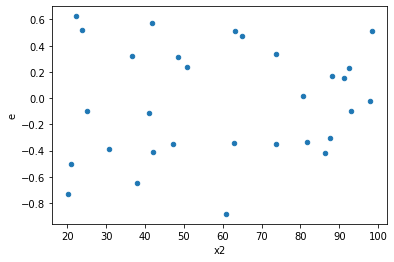

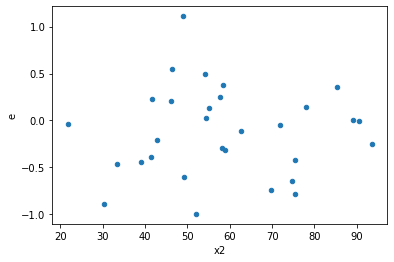

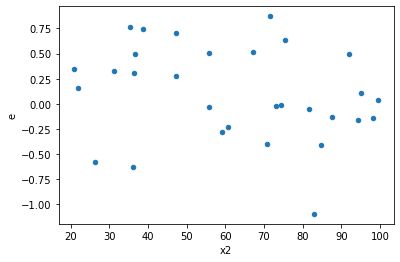

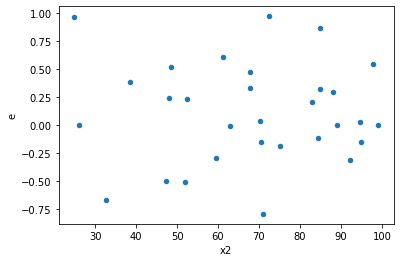

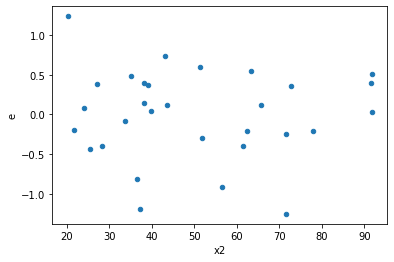

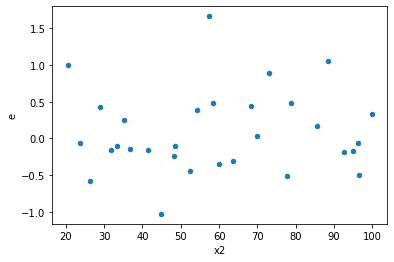

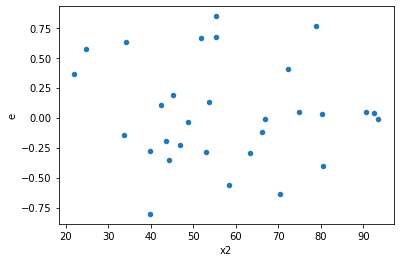

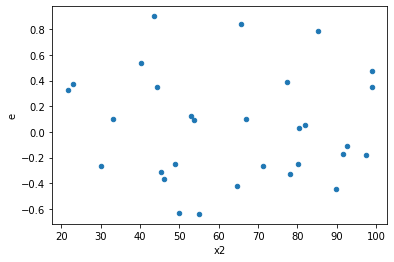

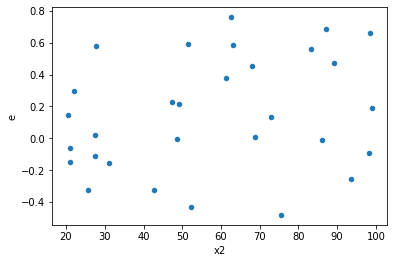

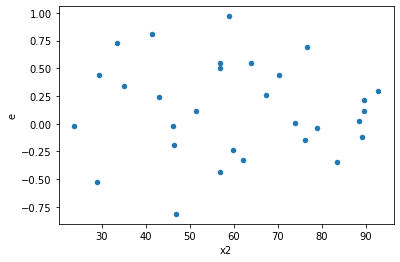

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,9.0,9.0,0.7366147234174398,2.385769331853899,0.08184608037971554,0.26508548131709986,3.2388292767016584,0.09489753395896239,0.9525512330205188,0.047448766979481194,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,0.8754654925003772,1.479995357693897,0.09727394361115302,0.16444392863265522,1.6905239216990147,0.44616794890288536,0.7769160255485573,0.22308397445144268,Reject005=1 : Homoscedasticity
12.0,9.0,9.0,0.9411564063728699,1.9928024856674873,0.10457293404142999,0.22142249840749859,2.1173977801920985,0.27905901961717605,0.860470490191412,0.13952950980858803,Reject005=1 : Homoscedasticity
16.0,9.0,9.0,1.1793671183828187,1.3095594974743716,0.1310407909314243,0.14550661083048574,1.110391732194532,0.878602487780253,0.5606987561098735,0.4393012438901265,Reject005=1 : Homoscedasticity
17.0,9.0,9.0,1.0574537792998848,1.5054326518921455,0.11749486436665386,0.16727029465468282,1.4236391995202446,0.6072188093026871,0.6963905953486564,0.30360940465134356,Reject005=1 : Homoscedasticity
18.0,9.0,9.0,0.5294566973219827,1.5013013819980163,0.05882852192466475,0.16681126466644625,2.835550838419214,0.1364623561878573,0.9317688219060714,0.06823117809392865,Reject005=1 : Homoscedasticity
22.0,9.0,9.0,1.4740624092546912,2.338524318806235,0.16378471213941015,0.259836035422915,1.5864486497478956,0.5025683397578269,0.7487158301210866,0.25128416987891344,Reject005=1 : Homoscedasticity
44.0,9.0,9.0,0.8796926166349308,1.837642809725424,0.09774362407054787,0.204182534413936,2.0889601378660188,0.28762911115303647,0.8561854444234818,0.14381455557651823,Reject005=1 : Homoscedasticity
45.0,9.0,9.0,1.2138300609364314,1.2850954544886277,0.1348700067707146,0.14278838383206974,1.0587111786449064,0.9336661200875311,0.5331669399562344,0.46683306004376557,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,1.1576417435621122,0.9327661594541559,0.12862686039579024,0.10364068438379509,0.805746825079057,0.7528951393861911,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,1.6733556214375465,0.8255303172680168,0.1859284023819496,0.09172559080755743,0.49333824005612165,0.3073793921834096,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,3.031226996391072,0.8267421701139456,0.336802999599008,0.09186024112377172,0.27274175477397467,0.06630852441932246,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,4.028093487233364,1.3004503351201027,0.44756594302592934,0.14449448168001142,0.32284512244856006,0.10746973637797953,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,0.7366147234174398,2.385769331853899,0.08184608037971554,0.26508548131709986,3.2388292767016584,0.09489753395896239,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,2.654041742799753,1.1391497716976051,0.29489352697775034,0.12657219685528945,0.4292132084162,0.22366427381868337,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,0.9620133939436366,0.9362097144334257,0.10689037710484851,0.10402330160371397,0.9731774217774324,0.968358081503596,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,1.4792349933062041,0.21999356676016568,0.16435944370068933,0.02444372964001841,0.14872117530728715,0.009067516236274257,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,0.8754654925003772,1.479995357693897,0.09727394361115302,0.16444392863265522,1.6905239216990147,0.44616794890288536,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      905
Reject005=0 : Heteroscedasticity     95
Name: Result_test, dtype: int64